### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


In [3]:
!pip install beautifulsoup4

You should consider upgrading via the 'c:\users\hp 15\appdata\local\programs\python\python36-32\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install requests

You should consider upgrading via the 'c:\users\hp 15\appdata\local\programs\python\python36-32\python.exe -m pip install --upgrade pip' command.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
page_content = requests.get('https://covid19.ncdc.gov.ng/')
soup = BeautifulSoup(page_content.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
 <head>
  <title>
   NCDC Coronavirus COVID-19 Microsite
  </title>
  <!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <meta content="" name="description">
    <meta content="" name="keywords"/>
    <meta content="Codedthemes" name="author">
     <!-- Google Tag Manager -->
     <script>
      (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id

In [3]:
print(soup.title.text)

NCDC Coronavirus COVID-19 Microsite


In [4]:
table_data = soup.find('table', id = 'custom1')

In [5]:
headers = []
for i in table_data.thead.find_all('th'):
    title = i.text.strip()
    headers.append(title)

In [6]:
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [7]:
row = []
for j in table_data.tbody.find_all('tr'):
    for k in j.find_all('td'):
        row.append(k.text.strip())

In [8]:
array_row = np.array(row).reshape(37,5)

In [9]:
# Save the data to a DataFrame object.
ncdc_df = pd.DataFrame(array_row, columns = headers)

In [10]:
ncdc_df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"59,560",589,"58,515",456
1,FCT,"19,887",516,"19,205",166
2,Kaduna,"9,115",15,"9,035",65
3,Plateau,"9,065",2,"9,006",57
4,Rivers,"7,323",38,"7,184",101
5,Oyo,"6,862",4,"6,734",124
6,Edo,"4,910",0,"4,725",185
7,Ogun,"4,684",0,"4,633",51
8,Kano,"4,003",9,"3,884",110
9,Ondo,"3,471",38,"3,368",65


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [11]:
confirmed_cases = pd.read_csv(r'C:\Users\hp 15\Desktop\Capstone_Ustacky\time_series_covid19_confirmed_global.csv')
recovered_cases = pd.read_csv(r'C:\Users\hp 15\Desktop\Capstone_Ustacky\time_series_covid19_recovered_global.csv')
deaths = pd.read_csv(r'C:\Users\hp 15\Desktop\Capstone_Ustacky\time_series_covid19_deaths_global.csv')

In [12]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190


In [13]:
confirmed = pd.melt(confirmed_cases, id_vars=['Province/State','Country/Region','Lat', 'Long'], var_name='Date', value_name='confirmed_cases')

In [14]:
recovered = pd.melt(recovered_cases, id_vars=['Province/State','Country/Region','Lat', 'Long'], var_name='Date', value_name='recovered_cases')

In [15]:
deaths = pd.melt(deaths, id_vars=['Province/State','Country/Region','Lat', 'Long'], var_name='Date', value_name='deaths')

In [16]:
recovered.head()

,Province/State,Country/Region,Lat,Long,Date,recovered_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [17]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,Date,confirmed_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [18]:
deaths.head()

,Province/State,Country/Region,Lat,Long,Date,deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [19]:
Budget = pd.read_csv(r'Budget data.csv')
RealGDP = pd.read_csv(r'RealGDP.csv')
covid_external = pd.read_csv(r'covid_external.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [20]:
#[Write Your Code Here]
Budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [21]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [22]:
covid_external.dtypes

states                      object
region                      object
Population                   int64
Overall CCVI Index         float64
Age                        float64
Epidemiological            float64
Fragility                  float64
Health System              float64
Population Density         float64
Socio-Economic             float64
 Transport Availability    float64
Acute IHR                  float64
dtype: object

In [23]:
covid_external['Age'].nunique()

11

In [24]:
RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [25]:
ncdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 804.0+ bytes


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [26]:
for col in ncdc_df.columns:
    if col != 'States Affected':
        ncdc_df[col] = ncdc_df[col].str.replace(',','')

In [27]:
ncdc_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,59560,589,58515,456
1,FCT,19887,516,19205,166
2,Kaduna,9115,15,9035,65
3,Plateau,9065,2,9006,57
4,Rivers,7323,38,7184,101


In [28]:
for col in ncdc_df.columns:
    if col != 'States Affected':
        ncdc_df[col] = ncdc_df[col].astype('int')

In [29]:
ncdc_df.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int32
No. of Cases (on admission)      int32
No. Discharged                   int32
No. of Deaths                    int32
dtype: object

In [30]:
ncdc_df = ncdc_df.rename(columns = {'States Affected': 'states',
    'No. of Cases (Lab Confirmed)': 'Number of cases confirmed in Lab',
                 'No. of Cases (on admission)':'Number of cases on admission',
                 'No. Discharged' : 'Number of Patients discharged',
                 'No. of Deaths': 'Number of Deaths'})

In [31]:
ncdc_df.head()

,states,Number of cases confirmed in Lab,Number of cases on admission,Number of Patients discharged,Number of Deaths
0,Lagos,59560,589,58515,456
1,FCT,19887,516,19205,166
2,Kaduna,9115,15,9035,65
3,Plateau,9065,2,9006,57
4,Rivers,7323,38,7184,101


TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [32]:
Nigeria = confirmed[confirmed['Country/Region'] == 'Nigeria']

In [33]:
Confirmed_Nigeria = Nigeria[['Date', 'confirmed_cases']].reset_index(drop = True)

In [34]:
Confirmed_Nigeria

,Date,confirmed_cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
492,5/28/21,166254
493,5/29/21,166285
494,5/30/21,166315
495,5/31/21,166518


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [35]:
Nigeria = recovered[recovered['Country/Region'] == 'Nigeria']
Recovered_Nigeria = Nigeria[['Date', 'recovered_cases']].reset_index(drop = True)

In [36]:
Recovered_Nigeria

,Date,recovered_cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
492,5/28/21,156546
493,5/29/21,156557
494,5/30/21,156558
495,5/31/21,158781


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [37]:
Nigeria = deaths[deaths['Country/Region'] == 'Nigeria']
deaths = Nigeria[['Date', 'deaths']].reset_index(drop = True)

In [38]:
deaths.head()

,Date,deaths
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [39]:
df2_lab = ncdc_df.sort_values('Number of cases confirmed in Lab', ascending = False)
df2_lab = df2_lab.iloc[:10,]

In [40]:
df2_lab

,states,Number of cases confirmed in Lab,Number of cases on admission,Number of Patients discharged,Number of Deaths
0,Lagos,59560,589,58515,456
1,FCT,19887,516,19205,166
2,Kaduna,9115,15,9035,65
3,Plateau,9065,2,9006,57
4,Rivers,7323,38,7184,101
5,Oyo,6862,4,6734,124
6,Edo,4910,0,4725,185
7,Ogun,4684,0,4633,51
8,Kano,4003,9,3884,110
9,Ondo,3471,38,3368,65


Text(0.5, 1.0, 'Ten States with the Highest Number of Cases Confirmed in the Lab')

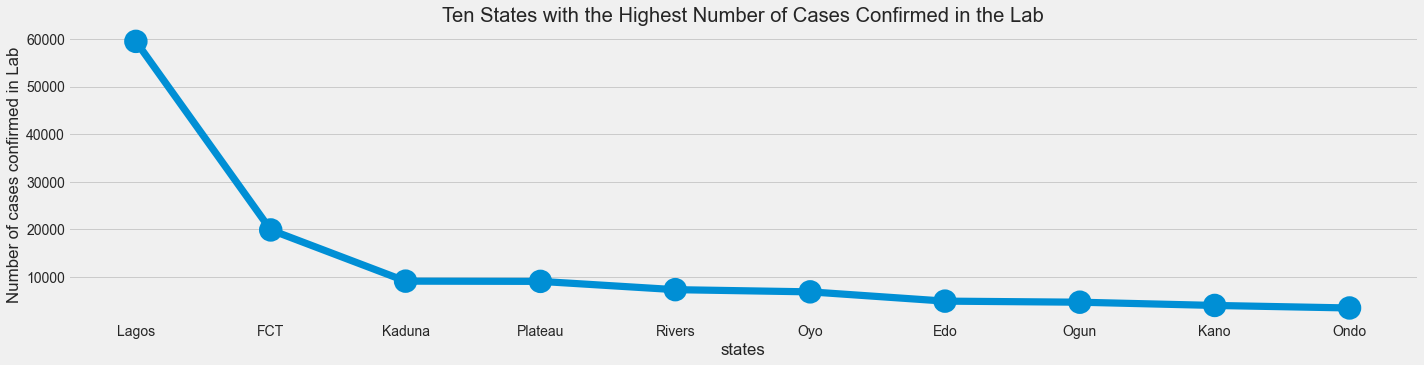

In [41]:
sns.catplot(x = 'states', y = 'Number of cases confirmed in Lab' , data = df2_lab, kind = 'point', aspect = 4)
plt.title('Ten States with the Highest Number of Cases Confirmed in the Lab')

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [42]:
df_discharge = ncdc_df.sort_values('Number of Patients discharged', ascending = False)

In [43]:
df_discharge = df_discharge.reset_index(drop = True)

In [44]:
df_discharge = df_discharge.iloc[:10,]

In [45]:
df_discharge

,states,Number of cases confirmed in Lab,Number of cases on admission,Number of Patients discharged,Number of Deaths
0,Lagos,59560,589,58515,456
1,FCT,19887,516,19205,166
2,Kaduna,9115,15,9035,65
3,Plateau,9065,2,9006,57
4,Rivers,7323,38,7184,101
5,Oyo,6862,4,6734,124
6,Edo,4910,0,4725,185
7,Ogun,4684,0,4633,51
8,Kano,4003,9,3884,110
9,Ondo,3471,38,3368,65


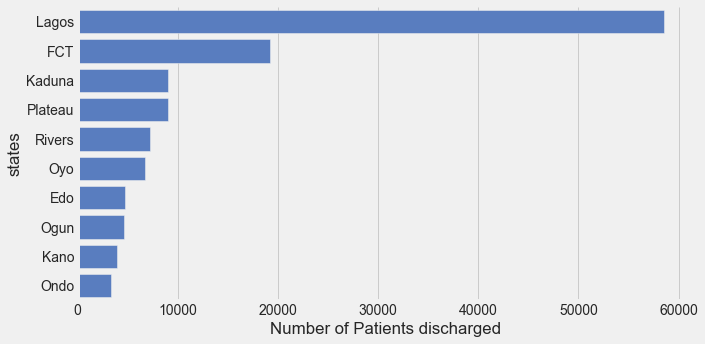

In [46]:
sns.set_color_codes("muted")
sns.catplot(y = 'states', x = 'Number of Patients discharged', data = df_discharge, kind = 'bar', aspect = 2, color = 'b')

TODO D - Plot the top 10 Death cases

In [47]:
df2_deaths = ncdc_df.sort_values('Number of Deaths', ascending = False)

In [48]:
df2_deaths = df2_deaths.reset_index(drop = True)

In [49]:
df2_deaths = df2_deaths.iloc[:10,]

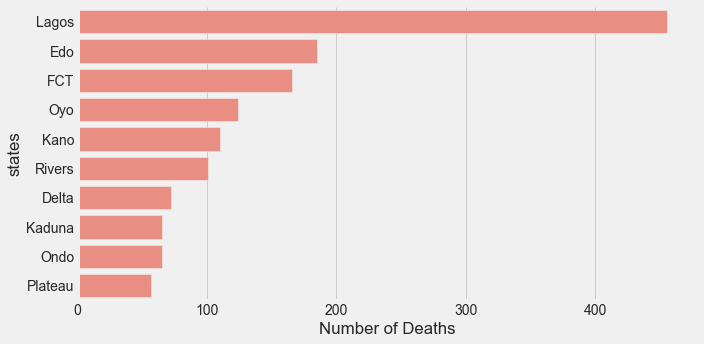

In [50]:
sns.set_color_codes("muted")
sns.catplot(y = 'states', x = 'Number of Deaths', data = df2_deaths, kind = 'bar', aspect = 2, color = 'salmon')

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [51]:
Confirmed_Nigeria.dtypes

Date               object
confirmed_cases     int64
dtype: object

In [52]:
Confirmed_Nigeria['Date'] = pd.to_datetime(Confirmed_Nigeria['Date'])
Recovered_Nigeria['Date'] = pd.to_datetime(Recovered_Nigeria['Date'])
deaths['Date'] = pd.to_datetime(deaths['Date'])

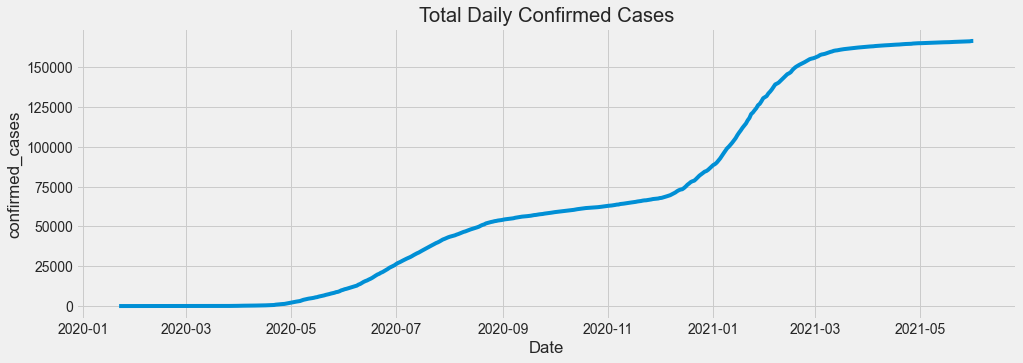

In [53]:
plt.figure(figsize = (15,5))
plt.title('Total Daily Confirmed Cases')
sns.lineplot(data = Confirmed_Nigeria, x = 'Date', y = 'confirmed_cases')

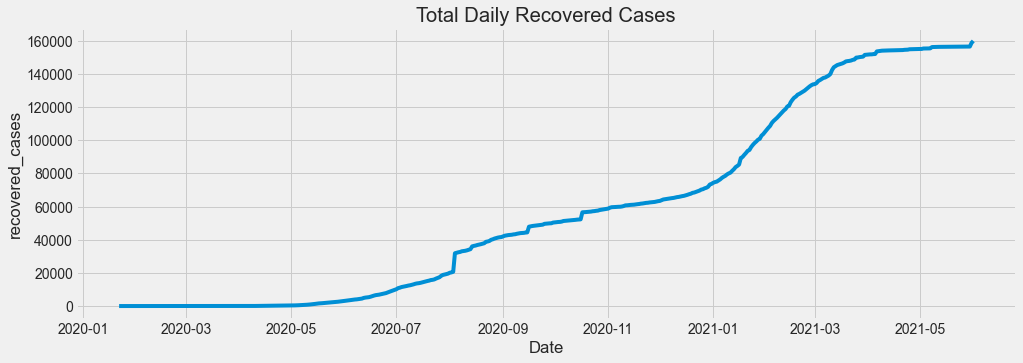

In [54]:
plt.figure(figsize = (15,5))
plt.title('Total Daily Recovered Cases')
sns.lineplot(data = Recovered_Nigeria, x = 'Date', y = 'recovered_cases')

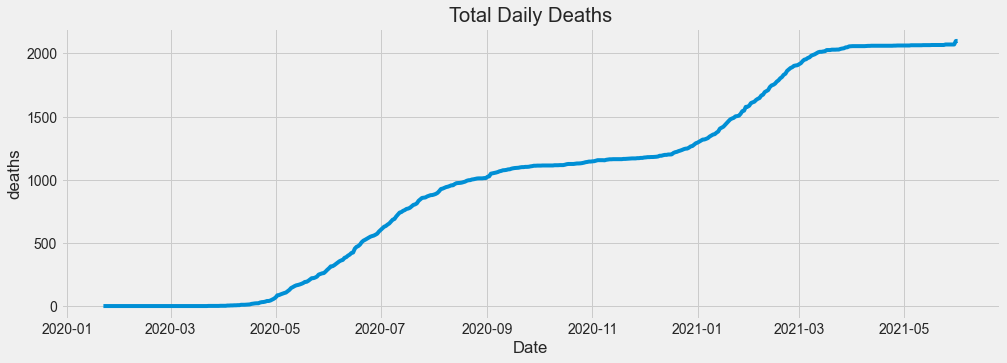

In [55]:
plt.figure(figsize = (15,5))
plt.title('Total Daily Deaths')
sns.lineplot(data = deaths, x = 'Date', y = 'deaths')

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [56]:
Confirmed_Nigeria['diff_confirmed_cases'] = Confirmed_Nigeria['confirmed_cases'].diff()

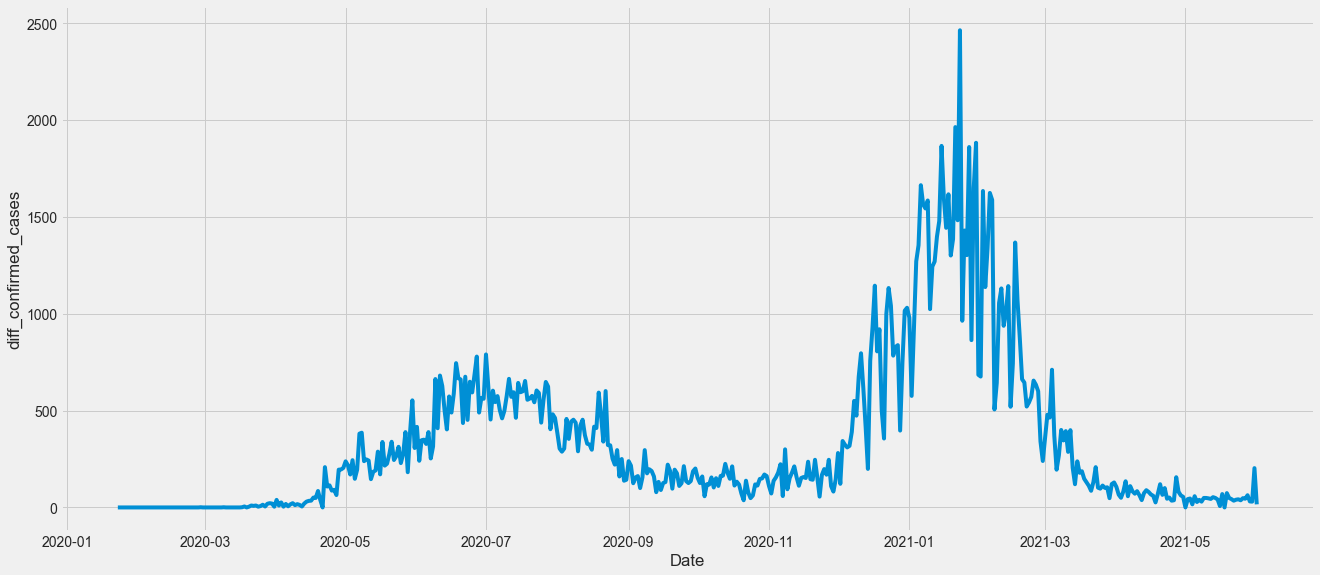

In [57]:
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Date', y = 'diff_confirmed_cases', data = Confirmed_Nigeria)

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [58]:
Confirmed_Nigeria['diff_confirmed_cases'].max()

2464.0

In [59]:
Confirmed_Nigeria[Confirmed_Nigeria['diff_confirmed_cases'] == 2464]

,Date,confirmed_cases,diff_confirmed_cases
367,2021-01-23,120602,2464.0


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [60]:
NCDC_external = ncdc_df.merge(covid_external, on = 'states', how = 'inner')

In [61]:
short_NCDC_external = NCDC_external.nlargest(10, 'Number of cases confirmed in Lab')

In [62]:
short_NCDC_external

,states,Number of cases confirmed in Lab,Number of cases on admission,Number of Patients discharged,Number of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,59560,589,58515,456,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19887,516,19205,166,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,9115,15,9035,65,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,9065,2,9006,57,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Rivers,7323,38,7184,101,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
5,Oyo,6862,4,6734,124,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,4910,0,4725,185,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,4684,0,4633,51,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,4003,9,3884,110,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Ondo,3471,38,3368,65,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


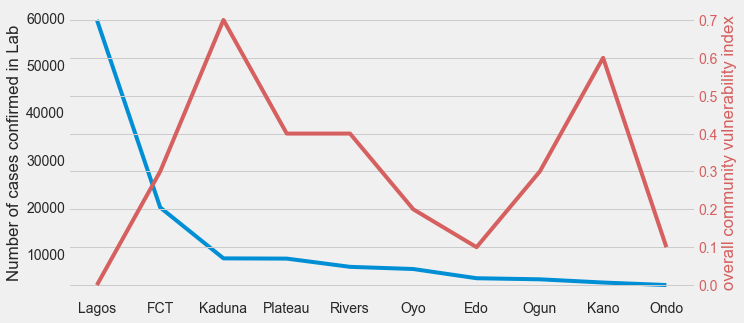

In [63]:
fig = plt.figure(figsize = (10,5))
plt.grid(False)
ax1 = fig.add_subplot(1,1,1)
ax1.plot(short_NCDC_external['states'], short_NCDC_external['Number of cases confirmed in Lab'])
ax1.set_ylabel('Number of cases confirmed in Lab')

ax2 = ax1.twinx()
ax2.plot(short_NCDC_external['states'], short_NCDC_external['Overall CCVI Index'],'r-')
ax2.set_ylabel('overall community vulnerability index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

**Observation:** <br>There's a negative relationship between number of cases confirmed in Lab and overall CCVI Index that is the higher the number of confirmed cases the lower the overall community vulnerability index in the states except in FCT

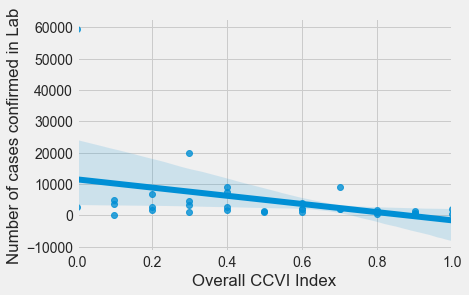

In [68]:
sns.regplot(y = 'Number of cases confirmed in Lab', x = 'Overall CCVI Index', data = NCDC_external)

The regression plot above confirms the negative relationship between number of confirmed cases and overall CCVI Index, as seen with FCT there are also some outliers in the plot. That is they do not conform with other data points.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

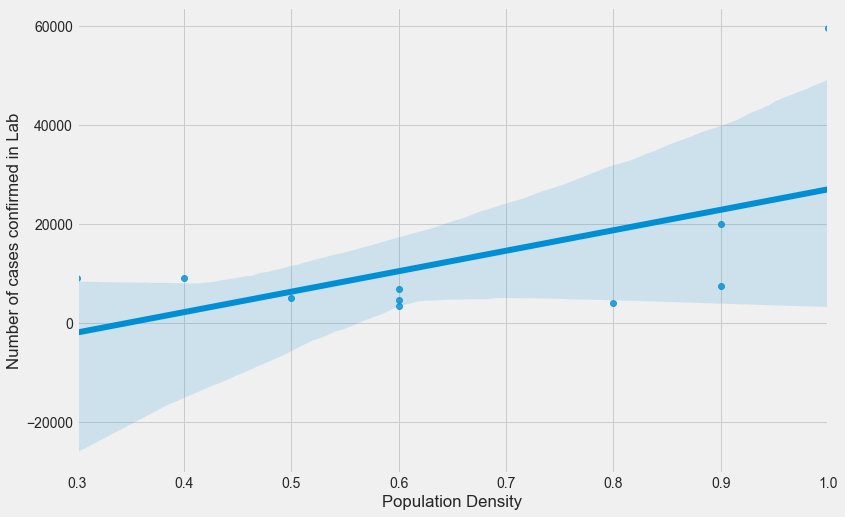

In [69]:
plt.figure(figsize = (12,8))
sns.regplot(y = short_NCDC_external['Number of cases confirmed in Lab'], x = short_NCDC_external['Population Density'])

**Observation:**<br>
There is a direct relationship between population density and number of cases confirmed in the lab, the higher the population density the higher the number of cases confirmed in the laboratory.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

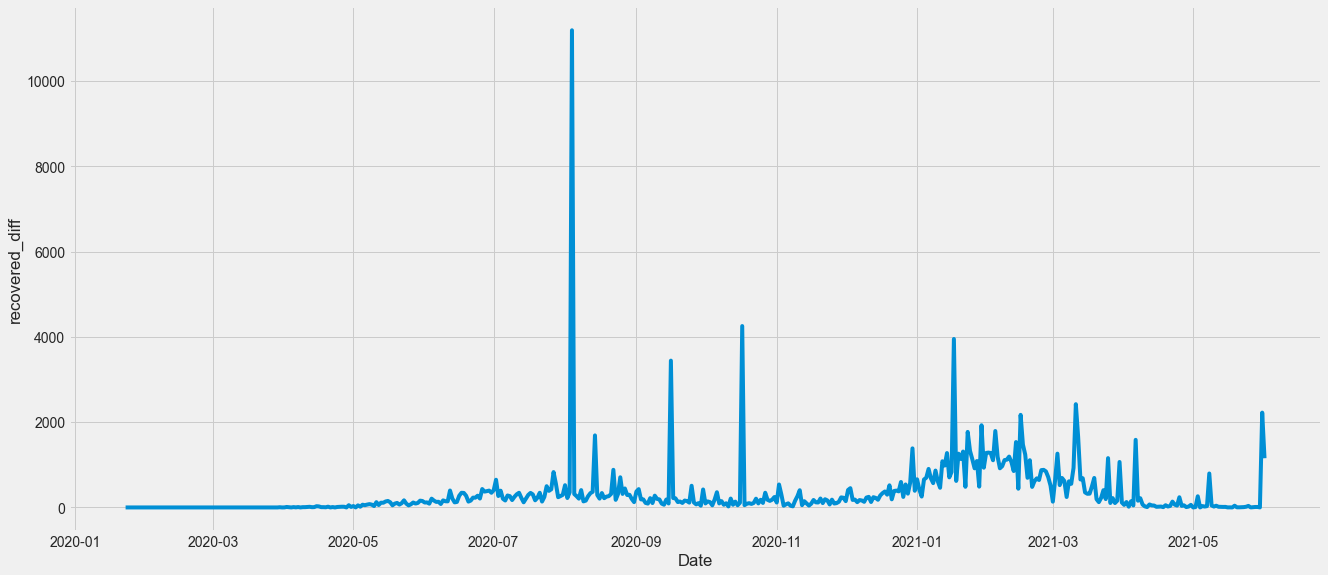

In [70]:
Recovered_Nigeria['recovered_diff'] = Recovered_Nigeria['recovered_cases'].diff()
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Date', y = 'recovered_diff', data = Recovered_Nigeria)

In [71]:
Recovered_Nigeria['recovered_diff'].max()

11188.0

In [72]:
Recovered_Nigeria[Recovered_Nigeria['recovered_diff'] == 11188.0]

,Date,recovered_cases,recovered_diff
195,2020-08-04,31851,11188.0


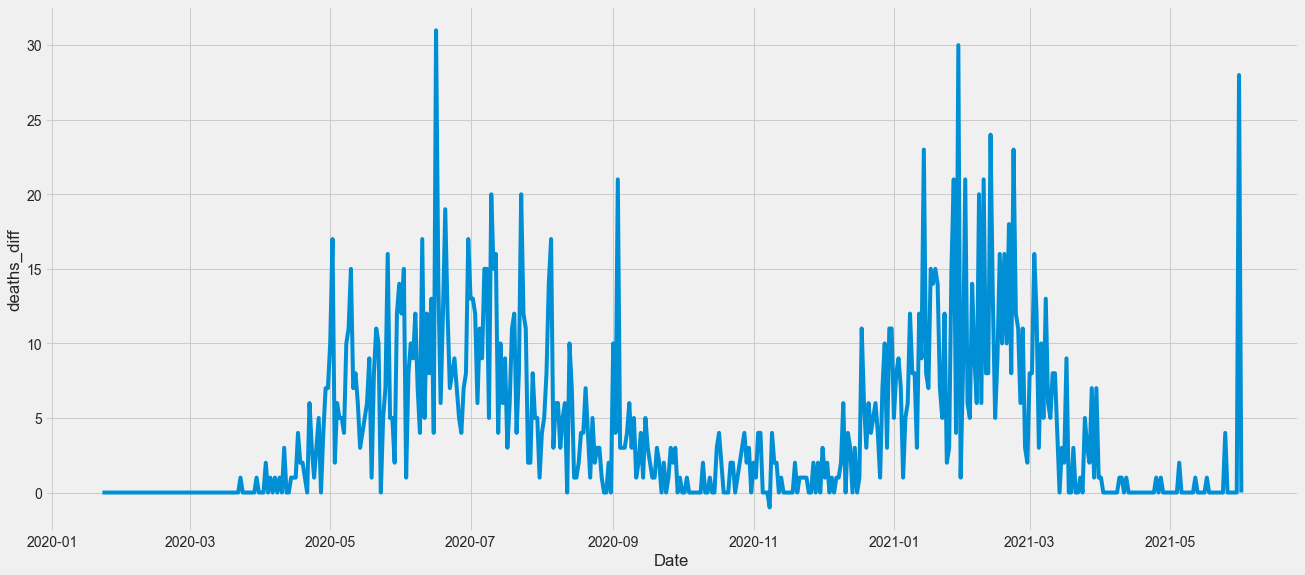

In [73]:
deaths['deaths_diff'] = deaths['deaths'].diff()
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Date', y = 'deaths_diff', data = deaths)

In [74]:
deaths['deaths_diff'].max()

31.0

In [75]:
deaths[deaths['deaths_diff'] == 31]

,Date,deaths,deaths_diff
146,2020-06-16,455,31.0


In [76]:
NCDC_external.columns

Index(['states', 'Number of cases confirmed in Lab',
       'Number of cases on admission', 'Number of Patients discharged',
       'Number of Deaths', 'region', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR'],
      dtype='object')

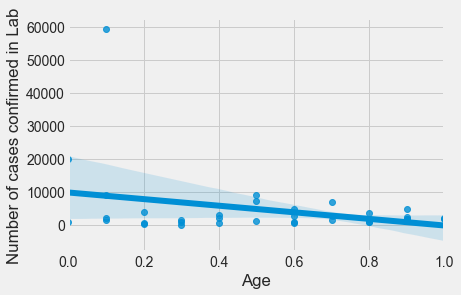

In [104]:
sns.regplot(x = NCDC_external['Age'], y = NCDC_external['Number of cases confirmed in Lab'])

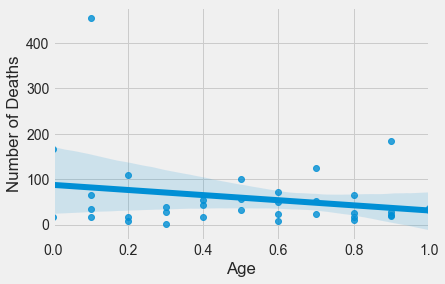

In [130]:
sns.regplot(x = NCDC_external['Age'], y = NCDC_external['Number of Deaths'])

There is also a negative correlation between Age Index Score and number of cases confirmed in Lab with Age Index Score and Number of Deaths that is when we have a low Age index score there are more confirmed cases and more number of deaths and vice versa.

In [78]:
new_acute = NCDC_external.sort_values('Acute IHR', ascending = False)

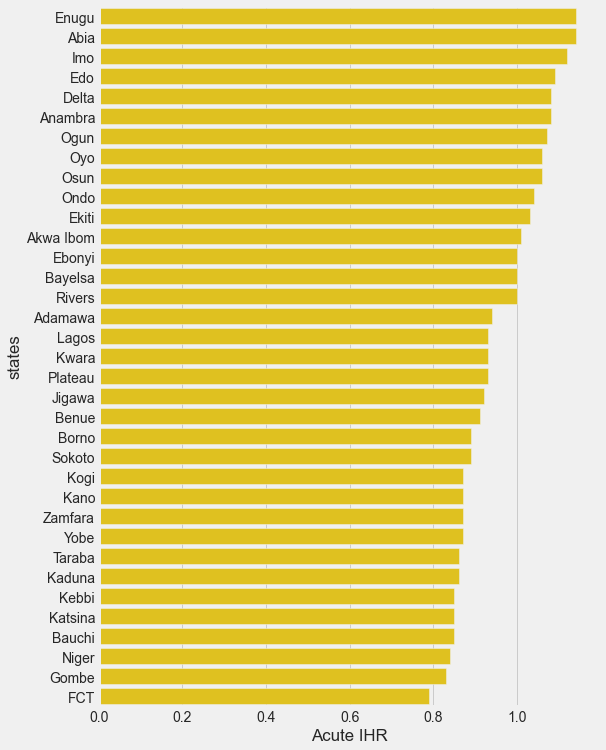

In [97]:
plt.figure(figsize = (8,12))
sns.set_color_codes("muted")
sns.barplot(x = new_acute['Acute IHR'], y = new_acute['states'], color = 'gold')

Enugu, Abia, Imo are the first 3 states with the highest number of people with Acute IHR that is people that got infected and are expected to require acute care.

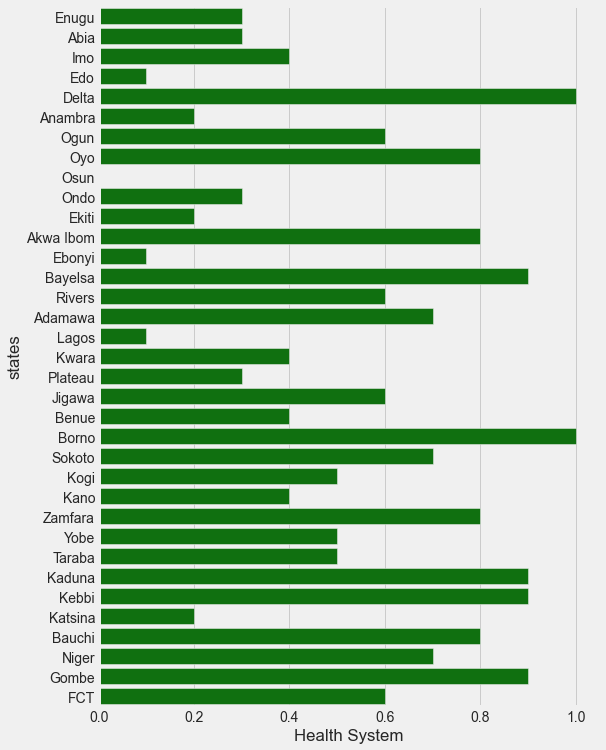

In [106]:
plt.figure(figsize = (8,12))
sns.set_color_codes("muted")
sns.barplot(x = new_acute['Health System'], y = new_acute['states'], color = 'green')

But these 3 states are seen to have a low health index score

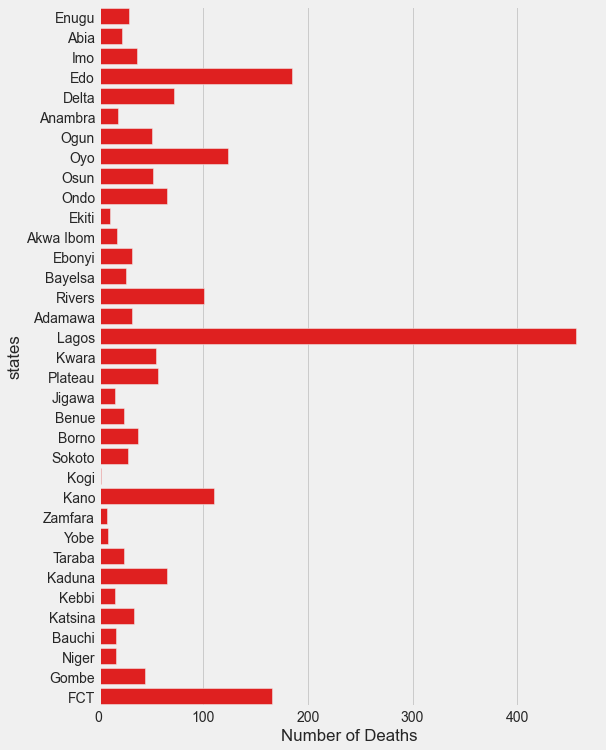

In [102]:
plt.figure(figsize = (8,12))
sns.set_color_codes("muted")
sns.barplot(x = new_acute['Number of Deaths'], y = new_acute['states'], color = 'red')

The number of deaths is also low in this three states too, but Lagos with a very high number of deaths has a low health index score and a high percentage of people who got infected and are expected to require acute care. This implies that despite the good health system in Lagos, more people still die.

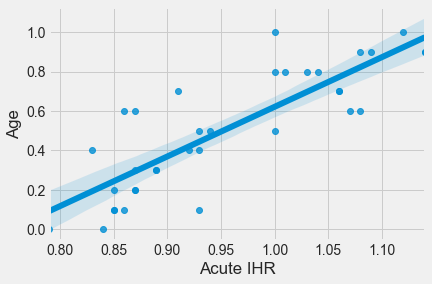

In [142]:
sns.regplot(x = 'Acute IHR', y = 'Age', data = NCDC_external)

From the plot above, it can be inferred that people with low age index score, are at lower risk of needing acute care when infected but people with high age index score are at higher risk of needing acute care when infected.

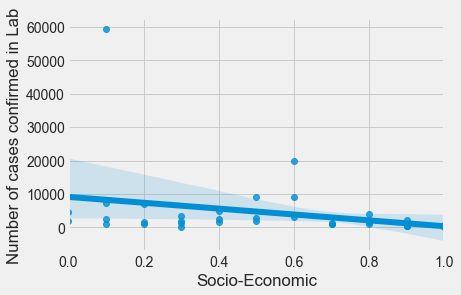

In [149]:
sns.regplot(x = NCDC_external['Socio-Economic'], y = NCDC_external['Number of cases confirmed in Lab'])

There is a negative relationship between Number of Cases Confirmed in Lab and Socio-Economic Index Score.

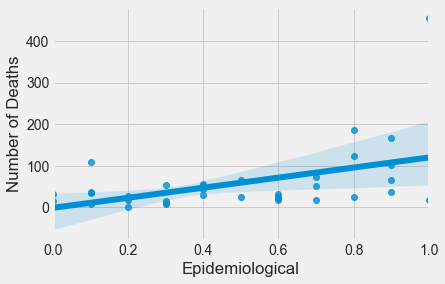

In [100]:
sns.regplot(x = NCDC_external['Epidemiological'], y = NCDC_external['Number of Deaths'])

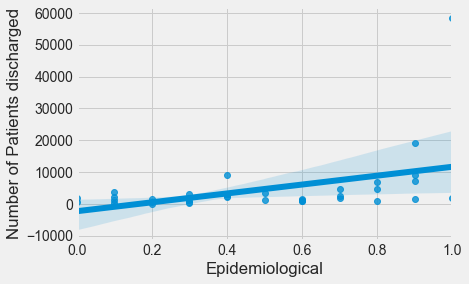

In [99]:
sns.regplot(x = NCDC_external['Epidemiological'], y = NCDC_external['Number of Patients discharged'])

There is a direct relationship between Epidemiological Index Score and Number of Deaths with Epidemiological Index Score and Number of Patients discharged.

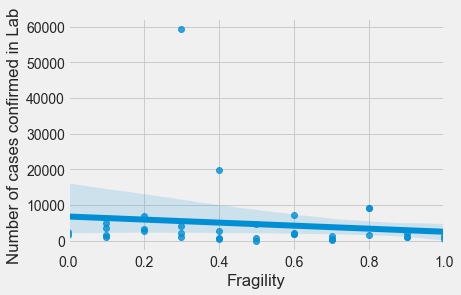

In [152]:
sns.regplot(x = NCDC_external['Fragility'], y = NCDC_external['Number of cases confirmed in Lab'])

There is a slight negative relationship between Fragility Index Score and Number of Cases Confirmed in Lab.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [107]:
RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [108]:
new_RealGDP= pd.melt(RealGDP, id_vars=['Year'], var_name='Quarter', value_name='Quarter_value')

In [109]:
new_RealGDP

,Year,Quarter,Quarter_value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


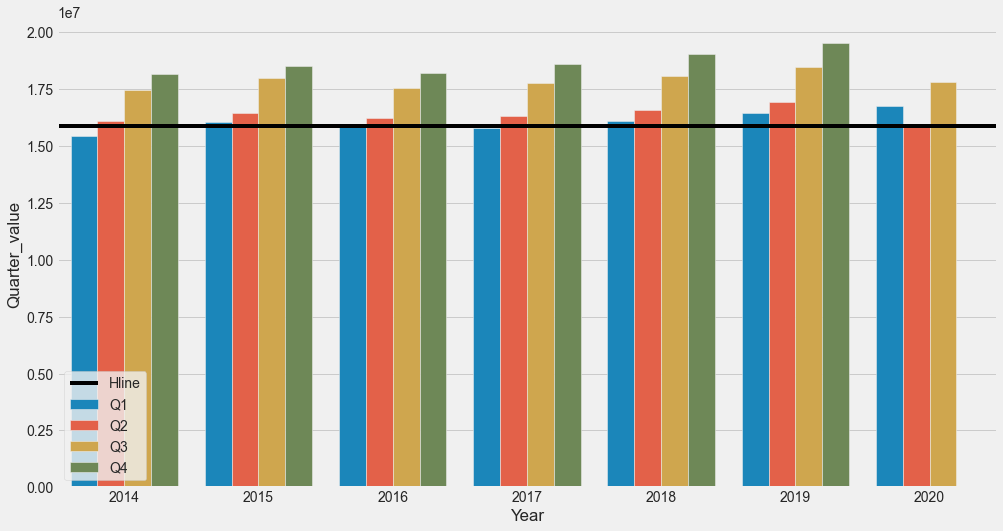

In [113]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Year', y = 'Quarter_value',hue = 'Quarter', data = new_RealGDP)
plt.axhline(y =15890000.00, label ='Hline', color ='black')
plt.legend(loc ='lower left')

From the plot above, the GDP of quarter 1 and quarter 2 of each year are always lesser than the GDP of quarter 3 and 4. It can also be inferred from the graph that 2020 had the lowest GDP for quarter 2 due to the impact of covid 19 on the economy.